In [1]:
import pandas
dataset = pandas.read_csv('/Users/chenzy/Documents/spring quarter/tim245/hw3/survey_dataset.csv', sep=',')
dataset = dataset.dropna()
dataset = dataset.reset_index(drop=True)

music = dataset.iloc[:, 0:19]
movies = dataset.iloc[:, 19:31]
hobbies = dataset.iloc[:, 31:63]
phobias = dataset.iloc[:, 63:73]
health = dataset.iloc[:, 73:76]
personality = dataset.iloc[:, 76:133]
spending = dataset.iloc[:, 133:140]
demographics = dataset.iloc[:, 140:150]

selected_category = movies

dataset = pandas.concat([selected_category, demographics], axis=1)
dataset = pandas.get_dummies(dataset)
dataset.head(10)

,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,...,Education_doctorate degree,Education_masters degree,Education_primary school,Education_secondary school,Only child_no,Only child_yes,Village - town_city,Village - town_village,House - block of flats_block of flats,House - block of flats_house/bungalow
0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,...,0,0,0,0,1,0,0,1,1,0
1,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,...,0,0,0,0,1,0,1,0,1,0
2,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,...,0,0,0,1,1,0,1,0,1,0
3,5.0,4.0,4.0,5.0,2.0,3.0,3.0,4.0,4.0,3.0,...,0,0,0,1,1,0,0,1,0,1
4,5.0,5.0,5.0,5.0,2.0,3.0,3.0,4.0,3.0,3.0,...,0,0,0,1,1,0,1,0,1,0
5,4.0,2.0,1.0,5.0,3.0,1.0,3.0,5.0,5.0,3.0,...,0,0,0,1,1,0,0,1,0,1
6,5.0,4.0,4.0,5.0,2.0,3.0,3.0,4.0,4.0,3.0,...,0,0,0,0,1,0,1,0,0,1
7,5.0,2.0,1.0,5.0,5.0,1.0,3.0,4.0,4.0,4.0,...,0,0,0,1,1,0,1,0,1,0
8,5.0,5.0,4.0,5.0,3.0,3.0,2.0,5.0,5.0,3.0,...,0,0,0,1,1,0,1,0,1,0
9,5.0,3.0,4.0,4.0,3.0,2.0,5.0,5.0,5.0,5.0,...,0,0,1,0,1,0,1,0,1,0


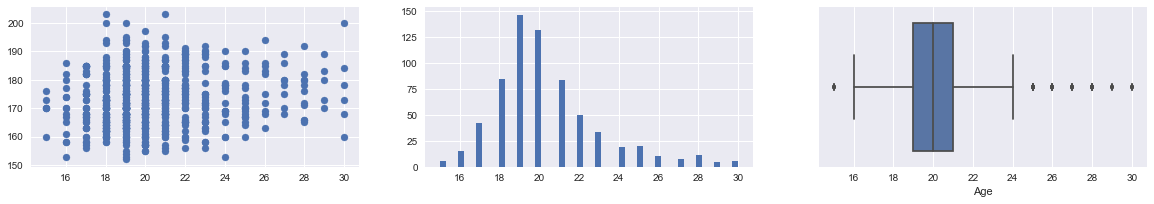

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

dataset.describe()

plt.figure(figsize=(20, 10))
#subplot syntax is rows, total number of plots, current plot index
plt.subplot(3,3,1)
plt.scatter(dataset['Age'], dataset['Height'])
plt.subplot(3,3,2)
plt.hist(dataset['Age'],bins=50)
plt.subplot(3,3,3)
sns.boxplot(dataset['Age'])
plt.show()

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 674 / 674
[t-SNE] Mean sigma: 3.917764
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.634610
[t-SNE] Error after 175 iterations: 0.634610


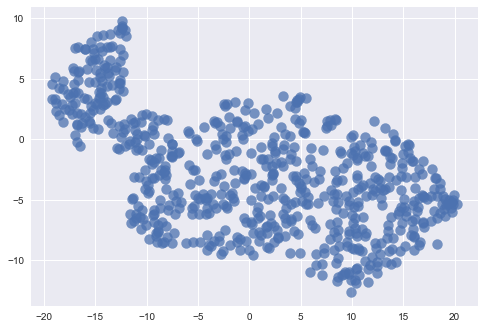

In [3]:
from sklearn.manifold import TSNE

#create the TSNE representation
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=500)
dataset_tsne = tsne.fit_transform(dataset)

#get the values for the two dimensional representation (x,y) for each instance in the dataset
tsne_x =  dataset_tsne [:,0]
tsne_y = dataset_tsne [:,1]

#plot the data
scatter = plt.scatter(tsne_x, tsne_y, alpha = .75,s = 100)
plt.show()